Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [16]:
%matplotlib inline
import random

import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

#importamos el fichero plot_prob.py que debe de estar en la misma
# carpeta que este cuaderno
from plot_prob import plot_samples_discrete

## Distribuciones de probabilidad

Una **distribución de probabilidad** es una descripción precisa de las probabilidades asociadas a los resultados de un experimento aleatorio.

Muchos sucesos aleatorios son bien conocidos y siguen una distribución de probabilidad que podemos encontrar en la wikipedia o en los libros de texto de probabilidad. Se les suele dar un nombre especial: (binomial, geométrica, gaussiana...).

 - **Uniforme**: El resultado del lanzamiento de un dado de seis caras; el último dígito del número de teléfono de una persona.
 - **Binomial**: En un crucero con n personas, anotamos cuántas personas de estas personas son celíacas.
 - **Geométrica**: Salimos con el barco tantas veces como sea necesario hasta avistar una ballena por primera vez, y anotamos el número de salidas.
 - **Poisson**: Anotamos el número de fallos de un sistema en cada semana.
 - **Gaussiana (aprox)**: Anotamos el peso de peces de la misma especie (si pesamos peces de distintas categorías la distribución sería aproximadamente una *mezcla de gaussianas* (*gaussian mixture model*)).

Las distribuciones de probabilidad se clasifican según el espacio muestral sea:

 - Un conjunto finito (**distribución discreta y finita**).
 - Un conjunto infinito, pero contable. Por ejemplo, los números naturales (**distribución discreta infinita**).
 - Un conjunto continuo, como un intervalo de números reales, o el conjunto de todos los números reales  (**distribución continua**).

Es importante entender esta distinción para poder manejarlas, incluso a nivel intuitivo.

Si simulamos un experimento en base a una distribución de probabilidad, decimos que hemos hecho una **extracción aleatoria** de esa distribución.

Si simulamos un experimento **N** veces de forma independiente, el resultado se llama una **muestra aleatoria independiente de tamaño N**.

Como hemos comentado, todavía de manera informal, podemos aproximar probabilidades de distribuciones de probabilidad usando una muestra aleatoria independiente mediante la fórmula de Cardano:

$$
Prob(\text{Suceso A}) \approx Prob_{\text{Muestra}}(\text{Suceso A}) = \dfrac{\text{Número de elementos de A en la muestra}}{\text{Tamaño de la muestra}}
$$

Es más, $Prob_{\text{Muestra}}(\cdot)$ es una *medida de probabilidad*, que cumple todas las reglas de cálculo de las medidas de probabilidad (probabilidad de la unión, teorema de Bayes, etc).

## Distribuciones discretas

En esta clase vamos a centrarnos en distribuciones de probabilidad discretas, y lo primero que vamos a hacer es intentar entender la relación entre la ley de distribución de probabilidad, y las frecuencias con las que nos encontramos cada posible resultado.


### Distribución de Bernoulli

Un experimento aleatorio *sigue una distribución de Bernoulli* si hay dos posibles resultados:

  - 0, con probabilidad 1-p
  - 1, con probabilidad p

Cualquier experimento aleatorio con dos resultados se puede representar mediante una distribución de Bernouilli asignando a uno de los dos posibles resultados el valor 0 y al otro, el valor 1:

  - Hacemos una salida con el barco, anotamos "1" si vemos algún cetáceo, "0" en otro caso. Si la probabilidad de avistamiento es del 5%, es una Bernoulli con p=0,05.
  - En cada día de operación, anotamos "**1**" si el sistema de comunicación *falla*, "0" si funciona. Si la probabilidad de fallo es del 10%, es una Bernoulli con p=0,1.
  - En cada día de operación, anotamos "**0**" si el sistema de comunicación *falla*, "1" si funciona. Si la probabilidad de fallo es del 10%, es una Bernoulli con p=0,9.

In [2]:
#La distribución depende de un parametro
p0 = 0.25
#El objeto Ber contiene los metodos asociados a una 
#distribucion concreta de la familia Bernoulli
Ber = st.bernoulli(p=p0)

La **función de masa** de una distribución de probabilidad indica la probabilidad de obtener cada posible resultado.

``Ber.pmf(0)`` es la probabilidad de obtener ``0`` y ``Ber.pmf(1)`` es la probabilidad de obtener ``1``.

In [3]:
#Usando Ber.pmf, podemos ver cuál es la probabilidad de 
#obtener 0, o de obtener 1
print(Ber.pmf(0), Ber.pmf(1))

0.75 0.25


In [4]:
Ber.pmf(2)

0.0

Una extracción aleatoria de la distribución nos devuelve un número aleatorio en el espacio muestral de la distribución, pero de tal forma que cuando hacemos muchas extracciones cada resultado aparece una proporción de veces parecida a la probabilidad que le asigna la funcion de masa.

``Ber.rvs(N)`` devuelve un array con ``N`` extracciones aleatorias independientes de la distribución ``Ber`` (una *muestra*).

In [5]:
#Cada vez que ejecutas esta celda, el resultado varía
muestra = Ber.rvs(20)
muestra

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [6]:
# ATENCION: no hay que fijar la semilla aleatoria con random.seed, 
#sino con np.random.seed(semilla)
#random.seed(12)
np.random.seed(12)
muestra = Ber.rvs(20)
muestra

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

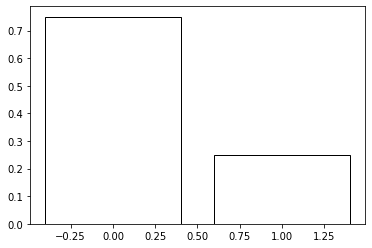

In [7]:
#Usando Ber.pmf, podemos ver cuál es la probabilidad de 
#obtener 0, o de obtener 1
plt.bar([0,1],[Ber.pmf(0), Ber.pmf(1)], fill=False)
plt.show()

#### Histogramas

Un [Histograma](https://es.wikipedia.org/wiki/Histograma) es una representación gráfica de una serie de datos en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados.

Comparamos la distribución teórica con el histograma de una muestra aleatoria de distintos tamaños.

Si extraemos una muestra pequeña, el histograma de la muestra no se parece demasiado a la distribución de probabilidad que hemos usado para obtener la muestra.

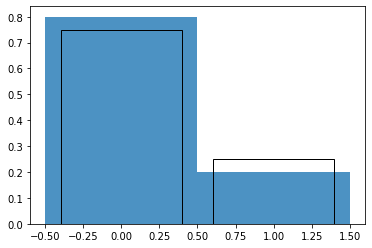

In [8]:
#Ejecutalo varias veces y veras como la forma cambia
#A veces se parece más, otras veces menos
muestra = Ber.rvs(10)
plt.hist(muestra, bins=[-0.5,0.5,1.5], density=1,alpha=0.8)
plt.bar([0,1],[Ber.pmf(0), Ber.pmf(1)],fill=False)
plt.show()

Pero si aumentamos el tamaño de la muestra aleatoria se parece mucho mas a la función de masa.

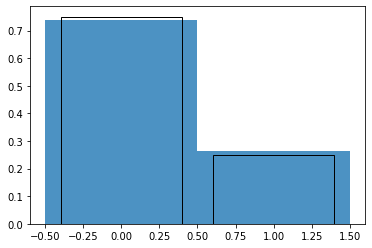

In [9]:
#Pero si aumentamos el tamanyo se parece mucho mas
muestra = Ber.rvs(1000)
plt.hist(muestra, bins=[-0.5,0.5,1.5], density=1,alpha=0.8)
plt.bar([0,1],[Ber.pmf(0), Ber.pmf(1)],fill=False)
plt.show()

### Distribución binomial

Tenemos un experimento de Bernoulli con probabilidad **p**:

  - 0, con probabilidad 1-p
  - 1, con probabilidad p

**Repetimos el experimento** **n** veces de forma independiente, y anotamos *cuántas veces hemos ganado*.

El **espacio muestral** son los números naturales entre 0 y n.

Depende de dos parámetros:
 - La probabilidad **p** de ganar cada juego individual.
 - El número total de veces **n** que jugamos.

Puedes encontrar más información sobre la [distribución binomial en la wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)

In [10]:
#La distribución depende de dos parametros
p0 = 0.2
n0 = 10
#El objeto B contiene los metodos asociados a una distribucion concreta de la familia binomial
B = st.binom(n=n0, p=p0)

La **función de masa** de la distribución binomial indica la probabilidad de ganar 0, 1, 2 ... hasta el máximo de **n** veces.

Si ``B`` es la distribución, ``B.pmf(k)`` es la probabilidad del valor ``k``.

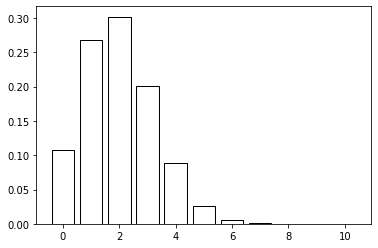

In [11]:
#Usando B.pmf, podemos ver cuál es la probabilidad de ganar 0, 1, 2 ... hasta n0 veces
plt.bar(range(n0+1),[B.pmf(k) for k in range(n0+1)], fill=False)
plt.show()

``B.rvs(n)`` devuelve un array con n extracciones aleatorias independientes de la distribución ``B``.

In [12]:
#Cada vez que ejecutas esta celda, el resultado varía
muestra = B.rvs(20)
muestra

array([0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 4, 2, 2, 2, 2, 4, 1, 3, 2])

Comparemos el histograma de una muestra aleatoria de tamaño pequeño con las probabilidades de la función de masa...

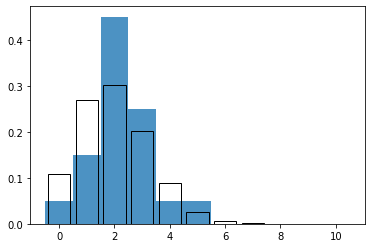

In [13]:
np.random.seed(6)
muestra = B.rvs(20)
plt.hist(muestra, bins=[k+0.5 for k in range(-1,n0+1)], density=1,alpha=0.8)
plt.bar(range(n0+1),[B.pmf(k) for k in range(n0+1)],fill=False)
plt.show()

Si aumentamos el tamaño de la muestra aleatoria se parece mucho mas a la función de masa.

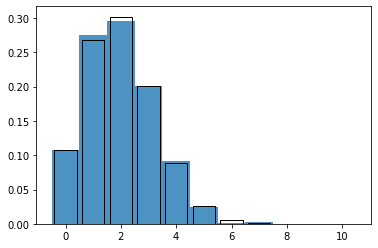

In [14]:
#Pero si aumentamos el tamaño se parece mucho más
np.random.seed(7)
muestra = B.rvs(1000)
plt.hist(muestra, bins=[k+0.5 for k in range(-1,n0+1)], density=1,alpha=0.8)
plt.bar(range(n0+1),[B.pmf(k) for k in range(n0+1)],fill=False)
plt.show()

Vamos a dibujar en una misma gráfica los histogramas que corresponden a muestras de tamaños distintos.

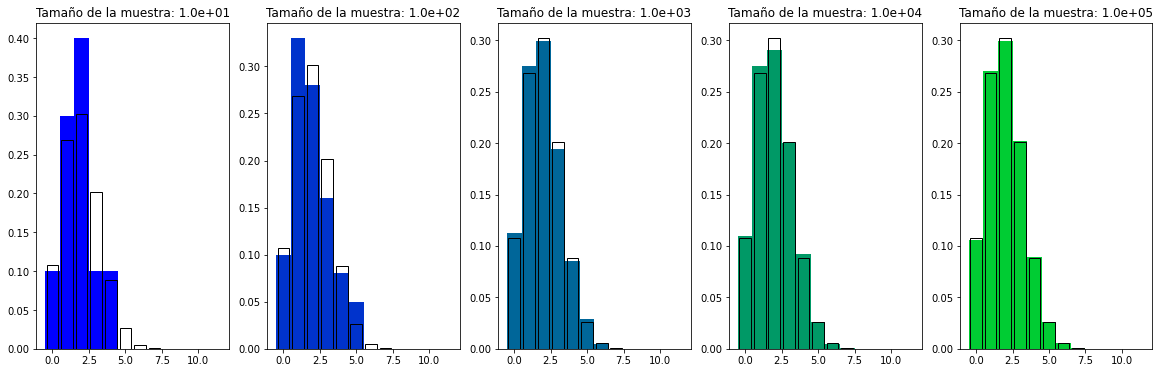

In [15]:
sizes = [10**j  for j in range(1,6)]
samples = [(size, B.rvs(size)) for size in sizes]
plot_samples_discrete(samples, n0+1,B.pmf)

#### Simulando *a capela*

En este caso sabemos generar nosotros la muestra mediante una **simulación**, usando únicamente el generador de números aleatorios de la CPU (random.random).

 - Primero escribimos una función que corresponde a una jugada:
   - Extraemos un número aleatorio entre 0 y 1 mediante ``random.random()``.
   - Si ese número es menor que p (cosa que ocurre una proporción **p** de las veces), devolvemos 1 (éxito) y 0 en otro caso.

 - Después simulamos el resultado de jugar n veces de forma independiente y sumando los resultados.

In [17]:
def jugada(p):
    t = random.random()
    return t < p

def extraccion_aleatoria_binomial(p, n):
    resultados = [jugada(p) for j in range(n)]
    return sum(resultados)

def muestra_aleatoria_binomial(p, n, K):
    return [extraccion_aleatoria_binomial(p, n)
            for _ in range(K)]

muestra_aleatoria_binomial(0.9, 100, 5)

[87, 87, 93, 85, 92]

In [18]:
B = st.binom( n=100, p=0.9)
B.rvs(5)

array([87, 90, 87, 92, 87])

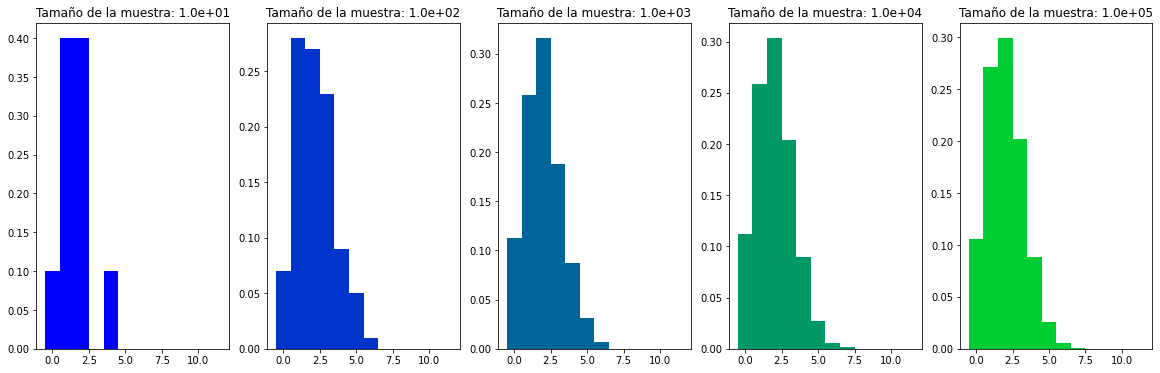

In [19]:
#Repetimos la grafica anterior usando nuestra propia funcion
sizes = [10**j  for j in range(1,6)]
samples = [(size, muestra_aleatoria_binomial(p0, n0, size)) for size in sizes]
plot_samples_discrete(samples, n0+1, B.pmf)

### Distribución geométrica

Repetimos un experimento aleatorio de Bernoulli que ofrece dos resultados:
  - 0, con probabilidad 1-p
  - 1, con probabilidad p

tantas veces como sea necesario, *de forma independiente*, hasta obtener "1" por primera vez, y anotamos cuántas veces hemos realizado el experimento (contando la última vez, que hemos obtenido "1").

Los posibles valores son los números positivos mayores que 1 => discreta infinita.

Depende de un uńico parámetro:
 - La probabilidad **p** de obtener un "1".
 
Ejemplos:
 - Lanzamos una moneda hasta obtener cara por primera vez.
 - Salimos con el barco tantas veces como sea necesario hasta avistar una ballena por primera vez, y anotamos el número de salidas.
 - Anotamos el número de días que un sistema ha funcionado sin averías entre dos reparaciones.
 

[Distribución geométrica en la wikipedia](https://en.wikipedia.org/wiki/Geometric_distribution).

In [20]:
p0 = 0.1
G = st.geom(p=p0)

In [21]:
#Muestras aleatorias
muestra = G.rvs(10)
muestra

array([ 9,  7, 17,  2,  7,  1, 14, 12,  3, 19])

Podemos comparar el histograma de una muestra aleatoria con la función de masa que dice la probabilidad de que tengamos que repetir 1,2,3 ... veces.

Pero para poder hacer el gráfico tenemos que elegir una cota **K**: consideramos que es *casi* imposible que obtengamos un número mayor.

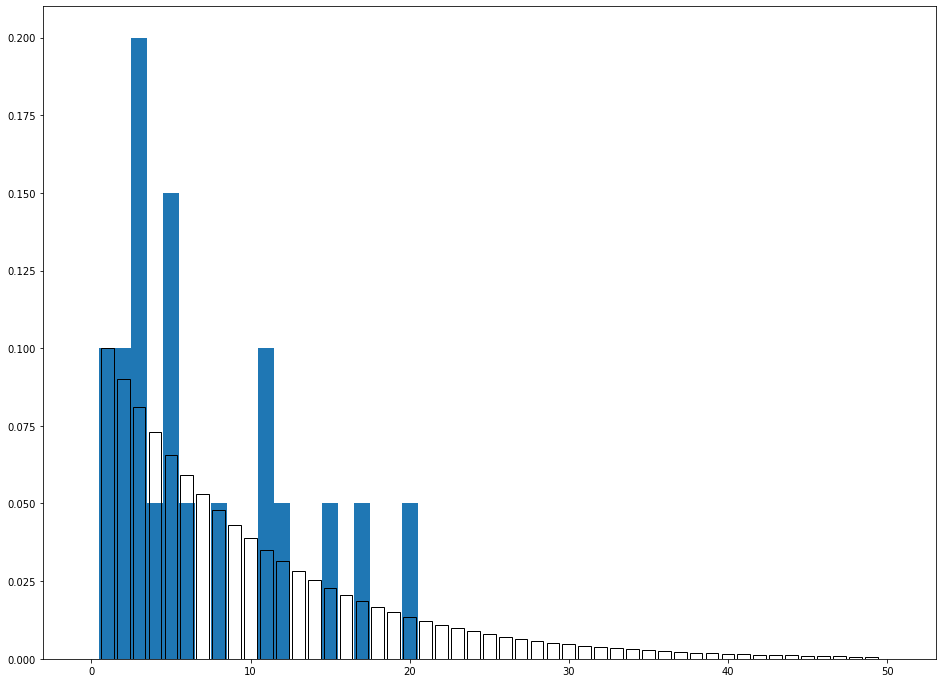

In [22]:
SAMPLE_SIZE = 20
muestra = G.rvs(SAMPLE_SIZE)
K = 50

plt.figure(figsize=(16,12))
plt.hist(muestra, density=1, bins=[k+0.5 for k in range(-1,K+1)])
plt.bar(range(K),[G.pmf(k) for k in range(K)],fill=False)
plt.show()

De nuevo si la muestra es lo bastante grande el histograma se parece mucho a la función de masa.

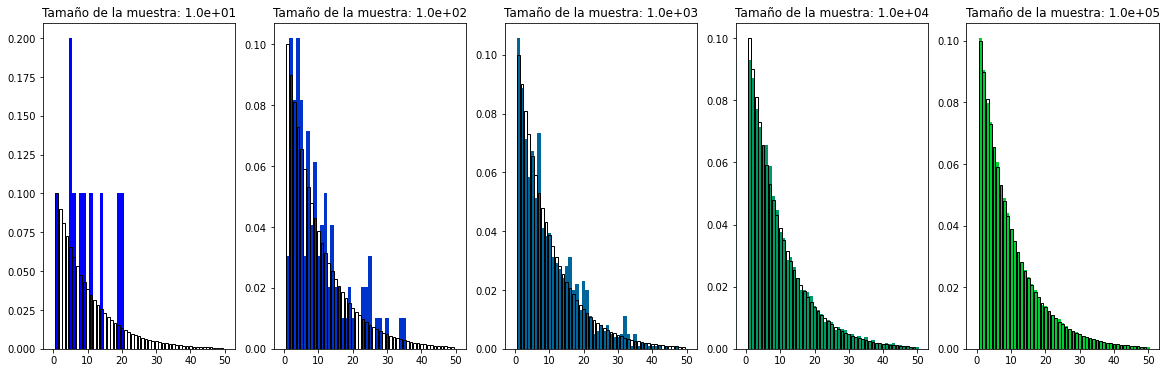

In [23]:
sizes = [10**j  for j in range(1,6)]
samples = [(size, G.rvs(size)) for size in sizes]
plot_samples_discrete(samples, int(5/p0), G.pmf)

También podemos simular este experimento, pero con un bucle while: repetimos hasta que un número aleatorio entre 0 y 1 sea menor que p (lo que ocurre una proporción **p** de las veces), y contamos el número total de extracciones.

In [24]:
def extraccion_aleatoria_geometrica(p):
    k=1
    while random.random() > p:
        k += 1
    return k

def geometrica_a_mano(p, K):
    return [ 
        extraccion_aleatoria_geometrica(p)
        for _ in range(K)]

geometrica_a_mano(p0, 10)

[6, 26, 2, 28, 5, 43, 14, 20, 28, 38]

In [25]:
G.rvs(10)

array([ 1,  4,  7, 17,  9, 51, 11, 21,  5,  7])

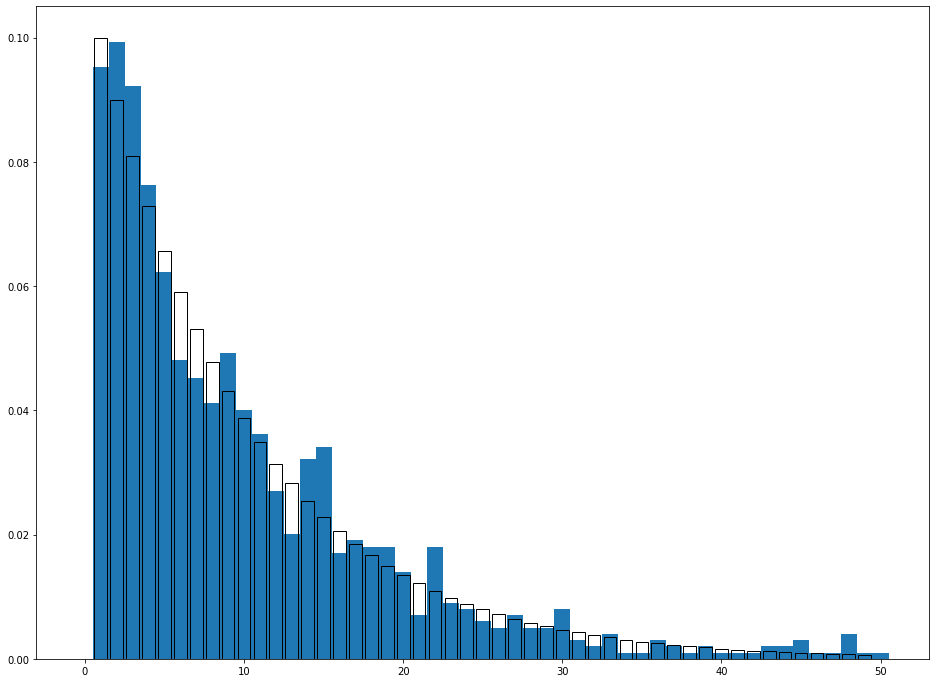

In [26]:
SAMPLE_SIZE = 1000
K = 50

plt.figure(figsize=(16,12))
plt.hist(geometrica_a_mano(0.1, SAMPLE_SIZE), density=1, bins=[k+0.5 for k in range(-1,K+1)])
plt.bar(range(K),[G.pmf(k) for k in range(K)],fill=False)
plt.show()

## Glosario en inglés

 - **distribución de probabilidad**: *probability distribution*
 - **muestra aleatoria**: *random sample*
 - **histograma**: *histogram*
 - **función de masa**: *probability mass function*
 - **independiente**: *independent*

## Ejercicios

### Distribución uniforme discreta

- Busca en scipy.stats la distribución uniforme discreta (puedes usar un buscador)
- Dibuja su función de masa y compáralo con el histograma de una extracción aleatoria.

### Suma de dos binomiales

 - Escribe una simulación que corresponda a hacer dos extracciones independientes de una Binomial(n=10,p=0.2) y sumar los resultados obtenidos.
 - Dibuja un histograma de una extracción aleatoria.
 - ¿Se parece esta distribución a alguna de las distribuciones que hemos visto antes? ¿A cuál? ¿Hay algún motivo para este parecido?

### Otra suma de dos binomiales

 - Escribe una simulación que corresponda a hacer una extracción  de una Binomial(n=10,p=0.2) y otra extracción independientes de una Binomial(n=10, p=0.8) y sumar los resultados obtenidos.
 - Dibuja un histograma de una extracción aleatoria.
 - ¿Se parece esta distribución a alguna de las distribuciones que hemos visto antes?